<a href="https://colab.research.google.com/github/Suhas-S63/Advanced_ML_Lab/blob/main/2348563_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

Loading the dataset

In [17]:
obe_data = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')
obe_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [18]:
obe_data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No missing values are present hence no values will be altered or dropped from the dataset

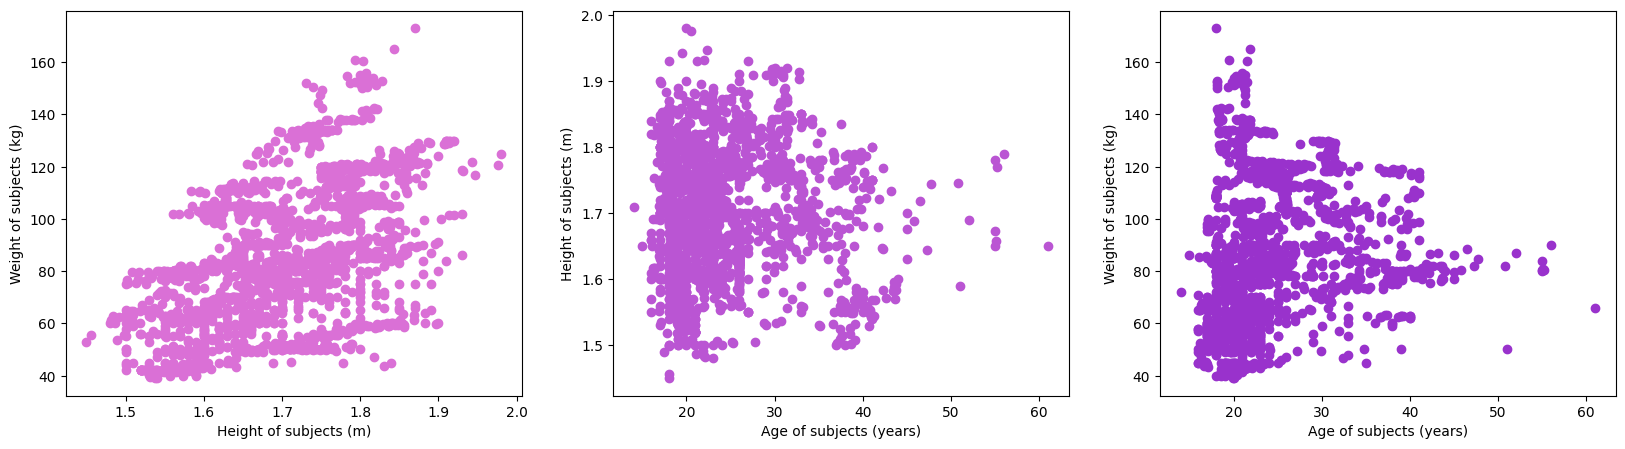

In [19]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].scatter(obe_data['Height'], obe_data['Weight'], color='orchid')
ax[0].set_xlabel('Height of subjects (m)')
ax[0].set_ylabel('Weight of subjects (kg)')
ax[1].scatter(obe_data['Age'], obe_data['Height'], color='mediumorchid')
ax[1].set_xlabel('Age of subjects (years)')
ax[1].set_ylabel('Height of subjects (m)')
ax[2].scatter(obe_data['Age'], obe_data['Weight'], color='darkorchid')
ax[2].set_xlabel('Age of subjects (years)')
ax[2].set_ylabel('Weight of subjects (kg)');

-> converting Categorical variables into numberical values using One Hot Encoding and Label Encoding

In [20]:
print(obe_data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [21]:
for cols in obe_data.columns:
  print(obe_data[cols].dtype)

object
float64
float64
float64
object
object
float64
float64
object
object
float64
object
float64
float64
object
object
object


In [22]:
categorical_columns = [column for column in obe_data.columns if obe_data[column].dtype == "object"]
print(categorical_columns)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [23]:
# Label Encoding for Categorical(Nominal) attributes
le = LabelEncoder()
encoded_attributes = []
le_col = categorical_columns[-1]
obe_data[le_col] = le.fit_transform(obe_data[le_col])
print("Label Encoded Attributes:",end="\n")
print(le_col)

# One Hot Encoding for Categorial(Ordinal) attribute
he_cols = categorical_columns[:-1]
obe_data = pd.get_dummies(obe_data, columns= he_cols)

print("Hot Label Encoded Attributes:",end="\n")
print(he_cols)

Label Encoded Attributes:
NObeyesdad
Hot Label Encoded Attributes:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In the above code, we apply One Hot Encoding for all categotical attributes except "NObeyesdad" since they are just categorical variable without any ordinal relation in them.

For "NObeyesdad", we apply Label Encoding for it since the categorical values are in an progressive(ordinal) order hence this encoding is more suitable.

In [24]:
obe_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1,1,...,0,0,0,0,1,0,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1,1,...,1,0,0,1,0,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,5,0,...,0,0,1,0,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,6,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,4,1,...,0,0,0,1,0,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,4,1,...,0,0,0,1,0,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,4,1,...,0,0,0,1,0,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,4,1,...,0,0,0,1,0,0,0,0,1,0


Standardization of the data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_features_scaled = scaler.fit_transform(obe_data)

Standardization used to remove any high variance within the dataset and to convert all the features to a standard dimension

K-Means Clustering with different K values

In [26]:
from sklearn.cluster import KMeans

k_values = [2,3,4,5,7]

for k in k_values:
  kmeans_cluster = KMeans(n_clusters = k, random_state = 42, n_init='auto')
  kmeans_cluster.fit(data_features_scaled)
  obe_data[f'Cluster_{k}'] = kmeans_cluster.labels_

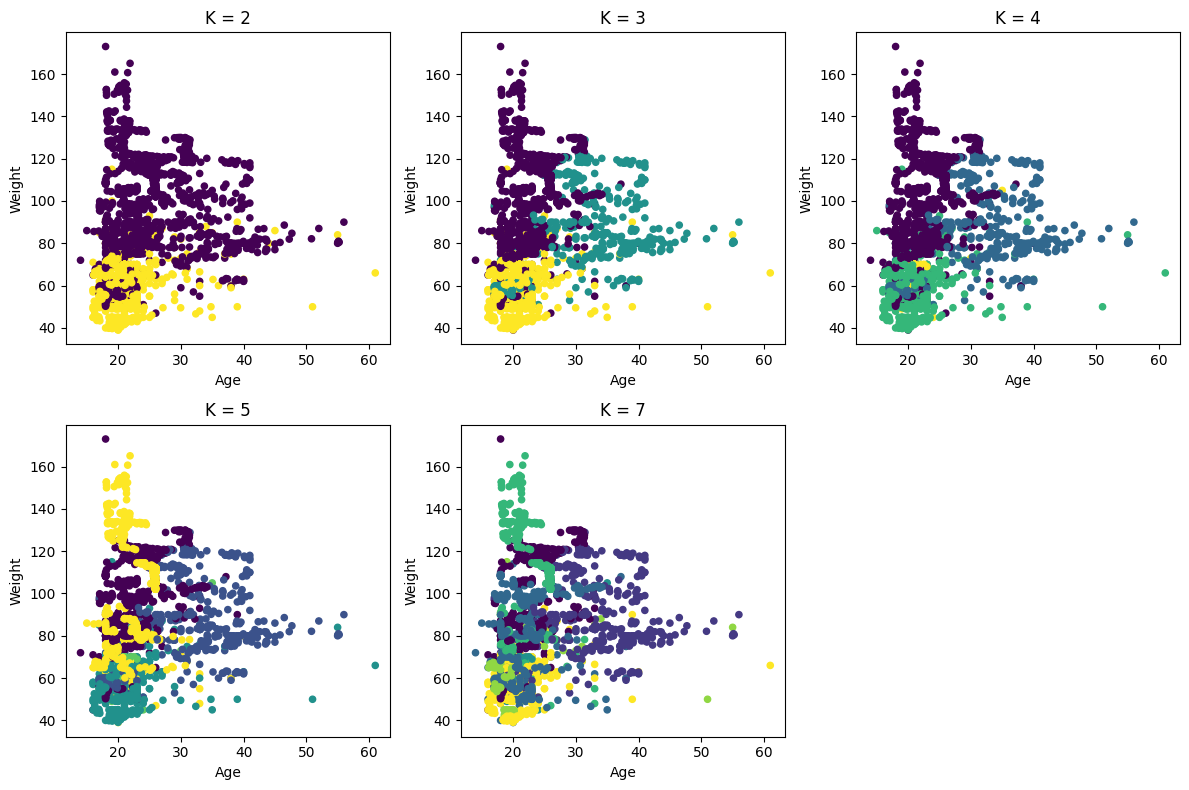

In [28]:
# Visualising the results
plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values, 1):
    plt.subplot(2, 3, i)
    plt.scatter(obe_data['Age'], obe_data['Weight'], c=obe_data[f'Cluster_{k}'], cmap='viridis', s=20)
    plt.title(f'K = {k}')
    plt.xlabel('Age')
    plt.ylabel('Weight')

plt.tight_layout()
plt.show()